## 통계학세미나 추천 시스템 코드(surprise 패키지 이용)

출처: https://datascienceschool.net/view-notebook/fcd3550f11ac4537acec8d18136f2066/

In [1]:
#데이터 불러옴
import pandas as pd
df = pd.read_csv('my_df.csv')
df.head(500) #상품아이디 / 사용자아이디 / 평점

#추천 시스템은 사용자 아이디와 상품 아이디라는 2개의 카테고리 입력과, 평점 출력을 가지는 예측 시스템임.

,beer,user,rating
0,47658,bluejacket74,4.97
1,66674,bluejacket74,4.04
2,48824,bluejacket74,3.71
3,55939,bluejacket74,4.10
4,68916,bluejacket74,4.34
5,74986,bluejacket74,4.42
6,76816,bluejacket74,4.00
7,178740,bluejacket74,3.77
8,142974,bluejacket74,4.00
9,5328,bluejacket74,3.48


In [2]:
df.shape

(101889, 3)

In [3]:
df[df.duplicated()==True] #중복 값 없음. 데이터엔 이상 x

,beer,user,rating


In [4]:
#유저를 이름 말고 숫자로 바꿔봄.
df.user.nunique()

333

In [5]:
user_list = df.user.unique().tolist()
user_list[:10]

['bluejacket74',
 'Lucular',
 'ColForbinBC',
 'secondtooth',
 'Derek',
 'Phyl21ca',
 'biboergosum',
 'vfgccp',
 'BigMike',
 'aasher']

In [6]:
df['int_user']=df['user']
df.head()

,beer,user,rating,int_user
0,47658,bluejacket74,4.97,bluejacket74
1,66674,bluejacket74,4.04,bluejacket74
2,48824,bluejacket74,3.71,bluejacket74
3,55939,bluejacket74,4.10,bluejacket74
4,68916,bluejacket74,4.34,bluejacket74


In [7]:
#ind = df[df.user==user_list[0]].index
#df.loc[ind, 'int_user']=0
#ind = df[df.user==user_list[332]].index
#df.loc[ind, 'int_user']=332

In [8]:
for n in range(0, 332):
    ind = df[df.user==user_list[n]].index
    df.loc[ind, 'int_user']=int(n)

In [9]:
df

,beer,user,rating,int_user
0,47658,bluejacket74,4.97,0
1,66674,bluejacket74,4.04,0
2,48824,bluejacket74,3.71,0
3,55939,bluejacket74,4.10,0
4,68916,bluejacket74,4.34,0
5,74986,bluejacket74,4.42,0
6,76816,bluejacket74,4.00,0
7,178740,bluejacket74,3.77,0
8,142974,bluejacket74,4.00,0
9,5328,bluejacket74,3.48,0


In [10]:
#피봇 테이블(x축: 상품, y축: 사용자) : 평점행렬 R
df_table = df.set_index(['int_user','beer']).unstack()
df_table.shape

(333, 962)

In [11]:
df_table.iloc[:50,:50].fillna(" ")
#이러한 평점행렬 R은 데이터가 일부 위치에만 존재하는 희소행렬(sparse matrix)
#(50x50) 개만 뽑음.

user                                              \
beer               6             30             31             33    
int_user                                                             
0         bluejacket74  bluejacket74   bluejacket74   bluejacket74   
1                                           Lucular                  
2                        ColForbinBC    ColForbinBC    ColForbinBC   
3          secondtooth   secondtooth    secondtooth    secondtooth   
4                              Derek          Derek          Derek   
5             Phyl21ca      Phyl21ca       Phyl21ca       Phyl21ca   
6                        biboergosum    biboergosum    biboergosum   
7                             vfgccp         vfgccp         vfgccp   
8                                                                    
9                             aasher         aasher                  
10                                                          Duff27   
11        rodbeermunch  rodbeermunch   rodbeermunch   rodbeermunch   
12                                                                   
13              rfgetz        rfgetz                        rfgetz   
14               Sammy         Sammy          Sammy          Sammy   
15                                                                   
16            cjgator3      cjgator3       cjgator3       cjgator3   
17                                                                   
18           Slatetank     Slatetank      Slatetank      Slatetank   
19                          Pencible                      Pencible   
20               pat61         pat61          pat61          pat61   
21                                                                   
22              argock        argock         argock         argock   
23             Knapp85       Knapp85        Knapp85        Knapp85   
24            metter98      metter98       metter98       metter98   
25          tobelerone                                  tobelerone   
26           dbrauneis     dbrauneis                     dbrauneis   
27             DoubleJ       DoubleJ        DoubleJ        DoubleJ   
28            Treyliff      Treyliff                      Treyliff   
29                                                                   
30         UCLABrewN84   UCLABrewN84    UCLABrewN84    UCLABrewN84   
31        ChainGangGuy  ChainGangGuy   ChainGangGuy   ChainGangGuy   
32              jwc215        jwc215         jwc215         jwc215   
33          WVbeergeek    WVbeergeek     WVbeergeek     WVbeergeek   
34                          corby112                      corby112   
35                        Hojaminbag     Hojaminbag     Hojaminbag   
36             tempest       tempest        tempest        tempest   
37            ovaltine                                    ovaltine   
38           beertunes     beertunes      beertunes      beertunes   
39          RblWthACoz    RblWthACoz     RblWthACoz     RblWthACoz   
40          kojevergas    kojevergas                    kojevergas   
41                                    womencantsail  womencantsail   
42                                        emerge077                  
43                       homebrew311                                 
44            champ103      champ103       champ103       champ103   
45                                          mfnmbvp                  
46             drabmuh       drabmuh        drabmuh        drabmuh   
47         kylehay2004   kylehay2004    kylehay2004                  
48                                                                   
49                       JamieDuncan    JamieDuncan    JamieDuncan   

                                                                      \
beer                34             39             59             61    
int_user                                                               
0          bluejacket74   bluejacket74                  bluejacket74   
1               Luc

TypeError: Image data cannot be converted to float

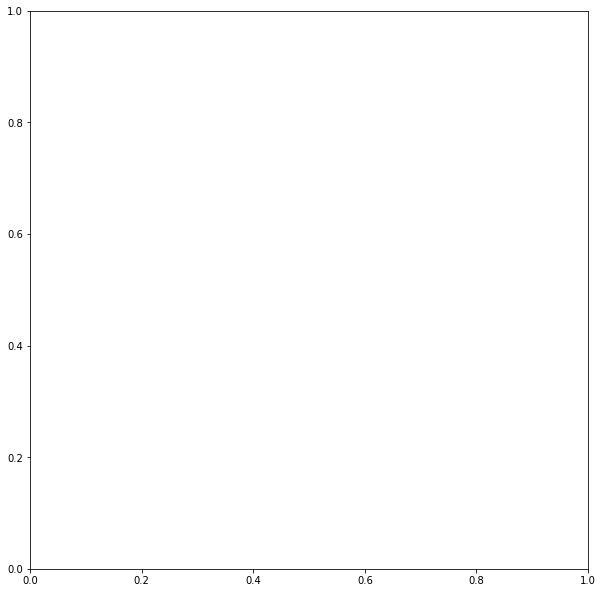

In [13]:
#시각화 #음... 희소해보이지가 않음....
import matplotlib.pyplot as plt

plt.figure(figsize=(10,12))
plt.imshow(df_table)
plt.grid(False)
plt.xlabel('item')
plt.ylabel('user')
plt.title('Rating Matrix(R)')
plt.show()

# 모델 제작 순서
- 데이터셋의 split, folds 메서드를 사용해 k-fold 트레이닝 데이터셋과 테스트 데이터셋 만듦
- 모형 알고리즘 객체 생성
- 모형 알고리즘 객체이 train 메서드와 트레이닝 데이터셋으로 모수를 추정한 후, test 메서드로 테스트 데이터셋에 대한 예측 실시
- accuracy 계산

- ★(evalueate 로 한번에도 가능.)

In [14]:
import surprise

# 베이스라인 모형

In [15]:
from surprise.model_selection import KFold
from surprise import BaselineOnly

In [16]:

bsl_options = {
    'method': 'als',
    'n_epochs': 5,
    'reg_u': 12,
    'reg_i': 5
}
algo = surprise.BaselineOnly(bsl_options)

np.random.seed(0)
acc = np.zeros(3)
cv = KFold(3)
for i, (trainset, testset) in enumerate(cv.split(data)):
    algo.fit(trainset)
    predictions = algo.test(testset)
    acc[i] = surprise.accuracy.rmse(predictions, verbose=True)
acc.mean()

NameError: name 'np' is not defined

In [17]:
#위의 코드 한번에
from surprise.model_selection import cross_validate
cross_validate(algo, data)

NameError: name 'data' is not defined

# Neighborhood 모형
<옵션>
- name: 사용할 유사도의 종류, 디폴트는 'MSD'
- user_based : True면 사용자 기반, False면 상품 기반
- min_support : 두 사용자나 상품에서 공통적으로 있는 평점 원소 수의 최솟값.
- shrinkage : shrinkage 가중치. 디폴트는 100

In [18]:
from surprise import KNNBasic

In [19]:
#우리는 코사인 유사도 사용!
sim_options = {'name': 'cosine'}
algo = surprise.KNNBasic(sim_options=sim_options)
cross_validate(algo, data)["test_mae"].mean()

NameError: name 'data' is not defined

## KNN 가중치 예측 방법
- KNNBasic : 평점들을 단순히 가중 평균함, N^k는 k개의 가장 유사도가 큰 벡터의 집합
- KNNWithMeans : 평점들을 평균값 기준으로 가중 평균함
- KNNBaseline : 평점들을 베이스라인 모형의 값 기준으로 가중 평균함

In [20]:
from surprise import KNNWithMeans
from surprise import KNNBaseline

In [21]:
sim_options = {'name': 'cosine'}
algo = surprise.KNNWithMeans(sim_options=sim_options)
cross_validate(algo, data)["test_mae"].mean()

NameError: name 'data' is not defined

In [22]:
sim_options = {'name': 'cosine'}
algo = surprise.KNNBaseline(sim_options=sim_options)
cross_validate(algo, data)["test_mae"].mean()

NameError: name 'data' is not defined

# 잠재 요인 방법(Latent Factor)
- 사용자의 특성 벡터나 상품의 특성 벡터의 길이는 수천에서 수십억에 달하는 긴 크기가 될 수도 있다.
- Latent Factor 모형은 이렇게 긴 사용자 특성이나 상품 특성을 몇 개의 요인 벡터로 간략화(approximate)할 수 있다는 가정에서 출발한 모형이다.
- PCA(Principle Component Analysis)를 사용하면 긴 특성 벡터를 소수의 차원으로 차원 축소할 수 있듯이 사용자의 특성도 차원 축소 할 수 있다.

- 영화에 대한 평점을 주는 경우, 코미디, 액션, 드라마 등 몇개의 장르 요인이 있어서 사용자는 특정한 장르 요소에 대해 더 점수를 많이 주거나 적게 줄 수 있다. 그리고 영화 자체도 이러한 장르 요인을 가지고 있다면 해당 사용자의 그 영화에 대한 평점은 사용자의 장르 요인 벡터와 영화의 장르 요인 벡터의 내적으로 표시할 수 있다.

# 1. SVD(Singular Value Decomposition)

In [23]:
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import train_test_split
import numpy as np

## SVD 클래스의 입력 파라미터
- n_factors: 잠재요인 k의 개수, 디폴트: 100, 커질수록 정확도가 높아질 수 있으나 과적합 문제 발생 가능
- n_epochs: SGD, 디폴트: 20
- biased : 베이스라인 사용자 편향 적용 여부, 디폴트: True

In [24]:
from surprise import Reader, Dataset

reader = Reader(line_format='user item rating', sep=',', rating_scale=(0.5,5))
#데이터의 칼럼 순서는 uid, iid, rating 순서를 반드시 지켜야 함
data = Dataset.load_from_df(df[['int_user','beer','rating']],reader)

In [25]:
trainset, testset = train_test_split(data, test_size=.25, random_state=0) #train, test set 분할

In [26]:
#SVD를 이용해 학습 수행
algo = SVD(n_factors=50, random_state=0)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.3371


0.33705645097044357

### 제대로 모델이 만들어졌을까? 한번 추천해보자.

In [27]:
#유저가 평가하지 않은 beer목록을 반환해 주는 함수 : get_unbeer_surprise

def get_unbeer_surprise(df, userid):
    beers = df[df['int_user']==userid]['beer'].unique().tolist() #해당 유저가 평가한 beer
    
    total_beers = df['beer'].unique().tolist() #모든 beer
    
    unbeers = [beer for beer in total_beers if beer not in beers] #해당 유저가 평가안한 beer
    
    print('이미 평가한 beer 수: ', len(beers), '안 평가한 beer 수: ' , len(unbeers), '전체 beer 수: ', len(total_beers))
    
    return unbeers

In [28]:
get_unbeer_surprise(df, 1)

이미 평가한 beer 수:  252 안 평가한 beer 수:  229 전체 beer 수:  481


[66674,
 142974,
 5328,
 45073,
 6,
 30,
 33,
 61,
 27800,
 88,
 90,
 148,
 156,
 1173,
 30288,
 197,
 198,
 199,
 222,
 1545,
 236,
 279,
 34420,
 42533,
 35732,
 353,
 361,
 448,
 580,
 607,
 43905,
 645,
 646,
 665,
 667,
 674,
 680,
 689,
 7850,
 709,
 727,
 33644,
 794,
 857,
 945,
 3833,
 39908,
 1153,
 1159,
 1161,
 1180,
 1212,
 1320,
 1331,
 43670,
 1351,
 1352,
 1372,
 1402,
 2010,
 57252,
 1558,
 1867,
 1566,
 1575,
 1587,
 1632,
 1655,
 1658,
 18198,
 1703,
 1708,
 1769,
 1792,
 2557,
 22505,
 1879,
 128500,
 1891,
 4318,
 2296,
 35397,
 2533,
 40149,
 3158,
 8023,
 60330,
 2093,
 25852,
 2392,
 2403,
 7520,
 2512,
 36333,
 2751,
 3089,
 14916,
 7284,
 3842,
 3916,
 4083,
 4109,
 5057,
 5385,
 6104,
 6260,
 6301,
 6533,
 6549,
 38470,
 52928,
 8919,
 8951,
 34146,
 18199,
 10325,
 88880,
 55412,
 17538,
 16074,
 80197,
 19216,
 28877,
 20478,
 20931,
 21822,
 22381,
 221289,
 39621,
 46987,
 25755,
 28204,
 48434,
 33832,
 82250,
 111969,
 52361,
 39286,
 137955,
 42723,
 5

In [30]:
beers = pd.read_csv('beers.csv')
beers.columns

Index(['id', 'name', 'brewery_id', 'state', 'country', 'style', 'availability',
       'abv', 'notes', 'retired'],
      dtype='object')

In [31]:
beers.head(3)

,id,name,brewery_id,state,country,style,availability,abv,notes,retired
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,7.3,No notes at this time.,f
1,82352,Konrads Stout Russian Imperial Stout,18604,NaN,NO,Russian Imperial Stout,Rotating,10.4,No notes at this time.,f
2,214879,Scottish Right,44306,IN,US,Scottish Ale,Year-round,4.0,No notes at this time.,t


In [32]:
def recomm_beer_by_surprise(algo, userid, unbeers, top_n=10):
    
    predictions = [algo.predict(userid, beer) for beer in unbeers] #대입된 userid가 평가 안한 beer에 algo.predict 반복 적용
    
    def sortkey_est(pred):
        return pred.est #앞의 prediciton에서 예상 평점인 pred.est만 반환
    
    predictions.sort(key=sortkey_est, reverse=True) #predicions를 pred.est값에 따라 sorting함. reverse=True이므로 내림차순 정렬(평점 큰 순서로)
    top_predictions=predictions[:top_n] #top_n으로 대입된 숫자까지만 predictions를 자름
    
    #top_n으로 추출된 영화아이디, 예상 평점, 제목 추출
    top_beer_ids = [ int(pred.iid) for pred in top_predictions ]
    top_beer_rating = [ pred.est for pred in top_predictions ]
    top_beer_titles = beers[beers.id.isin(top_beer_ids)]['name'] #데이터셋 필요
    top_beer_country = beers[beers.id.isin(top_beer_ids)]['country']
    top_beer_preds = [ (id, title, rating, country) for id, title, rating, country in zip(top_beer_ids, top_beer_titles, top_beer_rating, top_beer_country) ] 
    #앞에 정의한 것들을 id, 제목, 평점, 국가 순으로 반환
    
    return top_beer_preds


In [33]:
unbeers = get_unbeer_surprise(df, 133)

이미 평가한 beer 수:  266 안 평가한 beer 수:  215 전체 beer 수:  481


In [34]:
top_beer_preds = recomm_beer_by_surprise(algo, 13, unbeers, top_n=10)

In [35]:
top_beer_preds

[(115317, 'Trappist Westvleteren 12 (XII)', 4.634333124826371, 'BE'),
 (5281, "Cantillon Fou' Foune", 4.574543809827304, 'BE'),
 (1545, 'Dinner', 4.5745173584391345, 'US'),
 (131782,
  'Dark Horse Bourbon Barrel Aged Plead The 5th',
  4.568288329456685,
  'US'),
 (116067, 'King Sue', 4.535174654494977, 'US'),
 (113674, 'Double Dry Hopped Fort Point Pale Ale', 4.530954342954034, 'US'),
 (125646, 'Haze', 4.513631561506461, 'US'),
 (60426, 'Double Dry Hopped Melcher Street', 4.511274461323033, 'US'),
 (117177, 'Sip Of Sunshine', 4.502664681285446, 'US'),
 (150209, 'Vanilla Rye Bourbon County Brand Stout', 4.4991281409075246, 'US')]

In [36]:
print('<<TOP-10 추천 맥주 리스트>>')
for top_beer in top_beer_preds:
    print("추천맥주: ", top_beer[1]," / 예상 평점은: ", np.round(top_beer[2],3), " / 이 맥주의 판매국: ", top_beer[3])

<<TOP-10 추천 맥주 리스트>>
추천맥주:  Trappist Westvleteren 12 (XII)  / 예상 평점은:  4.634  / 이 맥주의 판매국:  BE
추천맥주:  Cantillon Fou' Foune  / 예상 평점은:  4.575  / 이 맥주의 판매국:  BE
추천맥주:  Dinner  / 예상 평점은:  4.575  / 이 맥주의 판매국:  US
추천맥주:  Dark Horse Bourbon Barrel Aged Plead The 5th  / 예상 평점은:  4.568  / 이 맥주의 판매국:  US
추천맥주:  King Sue  / 예상 평점은:  4.535  / 이 맥주의 판매국:  US
추천맥주:  Double Dry Hopped Fort Point Pale Ale  / 예상 평점은:  4.531  / 이 맥주의 판매국:  US
추천맥주:  Haze  / 예상 평점은:  4.514  / 이 맥주의 판매국:  US
추천맥주:  Double Dry Hopped Melcher Street  / 예상 평점은:  4.511  / 이 맥주의 판매국:  US
추천맥주:  Sip Of Sunshine  / 예상 평점은:  4.503  / 이 맥주의 판매국:  US
추천맥주:  Vanilla Rye Bourbon County Brand Stout  / 예상 평점은:  4.499  / 이 맥주의 판매국:  US


## 교차 검증과 하이퍼 파라미터 튜닝(모델 성능 평가) : surprise.model_selection
- cross_validate() : 교차 검증
- GridSearchCV() : 하이퍼 파라미터 튜닝(n_epochs, n_factors 지정)

In [37]:
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV

In [38]:
#5 k-fold CV
cross_validate(algo, data, measures = ['RMSE','MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.3380  0.3370  0.3415  0.3372  0.3349  0.3377  0.0021  
MAE (testset)     0.2441  0.2412  0.2441  0.2422  0.2383  0.2420  0.0021  
Fit time          5.72    5.74    5.41    5.57    5.29    5.54    0.18    
Test time         0.25    0.33    0.27    0.30    0.30    0.29    0.03    


{'test_rmse': array([0.33801101, 0.33695679, 0.34151014, 0.33724469, 0.33492326]),
 'test_mae': array([0.24406035, 0.24116523, 0.24412322, 0.24219241, 0.23831568]),
 'fit_time': (5.71749472618103,
  5.739650726318359,
  5.40749979019165,
  5.567112684249878,
  5.285860538482666),
 'test_time': (0.25129246711730957,
  0.32616162300109863,
  0.26832079887390137,
  0.2952461242675781,
  0.2982034683227539)}

In [ ]:
#GridSearch (시간이 너무 오래 걸린다ㅠㅠ)
#최적화할 파라미터 딕셔너리 형태로 지정
param_grid = {'n_epochs':[20,40,60], 'n_factors':[50,100,200]}
#CV를 3개 폴트 세트로 지정, 성능 평가는 rmse, mae로 수행.
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv=5)
gs.fit(data)

In [ ]:
#최고 RMSE Evaluation 점수와 그때의 하이퍼 파라미터는?
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

# 2. KNNBasic